In [1]:
import gym

env = gym.make('Taxi-v3')

In [ ]:
from agents.qlearning_agent import QLearningAgent
from agents.random_agent import RandomAgent

agent = QLearningAgent(env.action_space, env.observation_space)
agent = RandomAgent(env.action_space)

In [44]:
from IPython.display import clear_output
from agents.qlearning_agent import QLearningAgent
from main import evaluate

agent = QLearningAgent(env.action_space, env.observation_space)

total_penalties = 0
episodes = 30001
completions = 0

rewards_per_episode_Q = []
timesteps_per_episode_Q = []
penalties_per_episode_Q = []

rewards_per_episode_mean = []
timesteps_per_episode_mean = []
penalties_per_episode_mean = []

for episode in range(episodes):
    if episode % 100 == 0:
        clear_output(wait=True)
        print("Episode:", episode)
        mean_rewards, mean_penalties, mean_timesteps = evaluate(env, agent)
        rewards_per_episode_mean.append(mean_rewards)
        penalties_per_episode_mean.append(mean_penalties)
        timesteps_per_episode_mean.append(mean_timesteps)
        
    state = env.reset()
    reward = 0
    done = False
    penalties = 0
    total_reward = 0
    timesteps = 0
    # env.render()
    while not done:
        # env.render()
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        agent.update(state, action, next_state, reward)

        state = next_state
        total_reward += reward
        timesteps += 1

        if reward == -10:
            penalties += 1
        
        if reward == 20:
            completions += 1

    penalties_per_episode_Q.append(penalties)
    
    rewards_per_episode_Q.append(total_reward)
    timesteps_per_episode_Q.append(timesteps)

print()
print("Average penalties over episode", total_penalties / episodes)
print("Completions", completions)

#print(rewards_per_episode_Q)



Episode: 30000

Average penalties over episode 0.0
Completions 29758


In [5]:
from main import *

main = Main()

NameError: name 'Main' is not defined

In [35]:
from IPython.display import clear_output
from agents.random_agent import RandomAgent

agent = RandomAgent(env.action_space)

total_penalties = 0
episodes = 30001
completions = 0

rewards_per_episode_random = []
timesteps_per_episode_random = []
penalties_per_episode_random = []

for episode in range(episodes):
    if episode % 100 == 0:
        clear_output(wait=True)
        print("Episode:", episode)
        
    state = env.reset()
    reward = 0
    done = False
    penalties = 0
    total_reward = 0
    timesteps = 0
    # env.render()
    while not done:
        # env.render()
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        #agent.update(state, action, next_state, reward)

        state = next_state
        total_reward += reward
        timesteps += 1

        if reward == -10:
            penalties += 1
        
        if reward == 20:
            completions += 1

    penalties_per_episode_random.append(penalties)
    
    rewards_per_episode_random.append(total_reward)
    timesteps_per_episode_random.append(timesteps)

print()
print("Average penalties over episode", total_penalties / episodes)
print("Completions", completions)

print(rewards_per_episode_random)

Episode: 30000

Average penalties over episode 0.0
Completions 1449
[-740, -794, -875, -803, -740, -794, -794, -929, -866, -767, -956, -722, -713, -848, -686, -749, -857, -794, -776, -812, -767, -776, -785, -857, -668, -758, -830, -776, -821, -794, -794, -830, -758, -301, -767, -848, -821, -758, -767, -695, -758, -956, -794, -794, -749, -767, -785, -839, -650, -686, -857, -704, -884, -965, -821, -848, -839, -731, -803, -821, -713, -650, -778, -857, -803, -884, -749, -731, -776, -776, -776, -749, -677, -650, -749, -821, -758, -668, -812, -830, -758, -713, -713, -785, -839, -767, -893, -722, -767, -379, -839, -174, -821, -758, -731, -857, -758, -722, -875, -776, -956, -749, -866, -848, -776, -839, -749, -884, -812, -848, -803, -758, -641, -740, -812, -749, -821, -776, -866, -857, -767, -893, -839, -794, -758, -794, -758, -902, -821, -668, -767, -704, -794, -830, -758, -740, -776, -785, -821, -821, -785, -713, -830, -803, -875, -704, -821, -722, -731, -821, -749, -866, -866, -812, -902, -

In [5]:
def reduce_to_means(list, n=100):
    i = 1
    sum = 0
    means = []
    for item in list:
        sum += item
        if i == n:
            means.append(sum/n)
            sum = i = 0
        i += 1
    
    return means


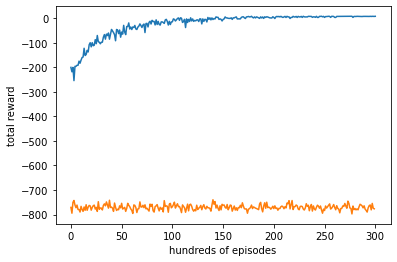

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
#rewards = reduce_to_means(rewards_per_episode_Q)
random_rewards = reduce_to_means(rewards_per_episode_random)

plt.plot(rewards_per_episode_mean)
plt.plot(random_rewards)
plt.ylabel('total reward')
plt.xlabel('hundreds of episodes')
plt.show()

In [31]:
timesteps_per_episode_mean[290:]


[13.05, 12.98, 12.59, 13.2, 13.32, 12.81, 13.3, 12.81, 13.19, 13.15, 12.79]

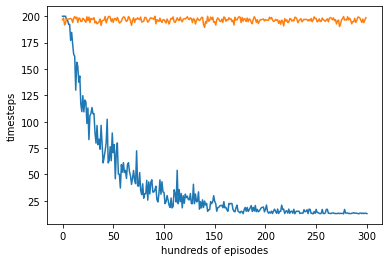

In [37]:
%matplotlib inline
#timesteps = reduce_to_means(timesteps_per_episode_Q, 100)
timesteps_random = reduce_to_means(timesteps_per_episode_random, 100)

plt.plot(timesteps_per_episode_mean)
plt.plot(timesteps_random)
plt.ylabel('timesteps')
plt.xlabel('hundreds of episodes')
plt.show()

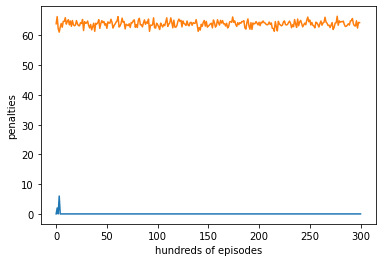

In [38]:
%matplotlib inline
#penalties = reduce_to_means(penalties_per_episode_Q)
penalties_random = reduce_to_means(penalties_per_episode_random)

plt.plot(penalties_per_episode_mean)
plt.plot(penalties_random)
plt.ylabel('penalties')
plt.xlabel('hundreds of episodes')
plt.show()

In [40]:
def render_frame():
    clear_output(wait=True)
    env.render()
    print("State", state)
    print("Reward", reward)
    print("Done", done)
    sleep(.3)

In [45]:
from time import sleep

total_penalties = 0
episodes = 100
completions = 0

for episode in range(episodes):
    state = env.reset()
    reward = 0
    done = False
    penalties = 0
    # env.render()
    while not done:
        action = agent.get_policy(state)
        next_state, reward, done, info = env.step(action)
        
        state = next_state

        if reward == -10:
            penalties += 1
        
        if reward == 20:
            completions += 1

        render_frame()
        
    total_penalties += penalties

print()
print("Average penalties over episode", total_penalties / episodes)
print("Completions", completions)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
State 475
Reward 20
Done True

Average penalties over episode 0.0
Completions 100
